C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groups.values, y=top_groups.index, palette="viridis")
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:21: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:21: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:21: UserWarning: Glyph 120044 (\N{MATHEMATICAL BOLD SCRIPT SMALL C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:21: UserWarning: Glyph 120052 (\N{MATHEMATICAL BOLD SCRIPT SMAL

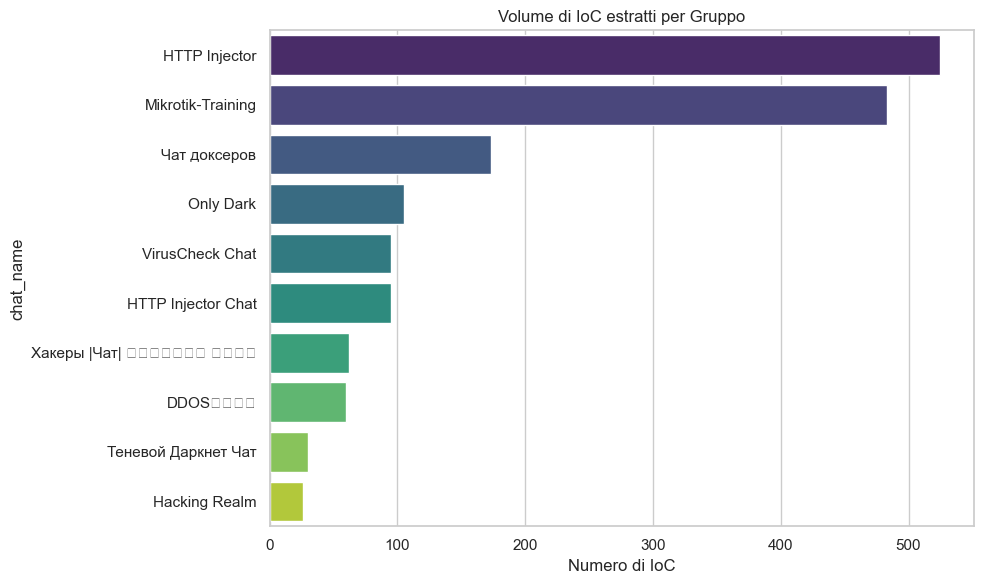

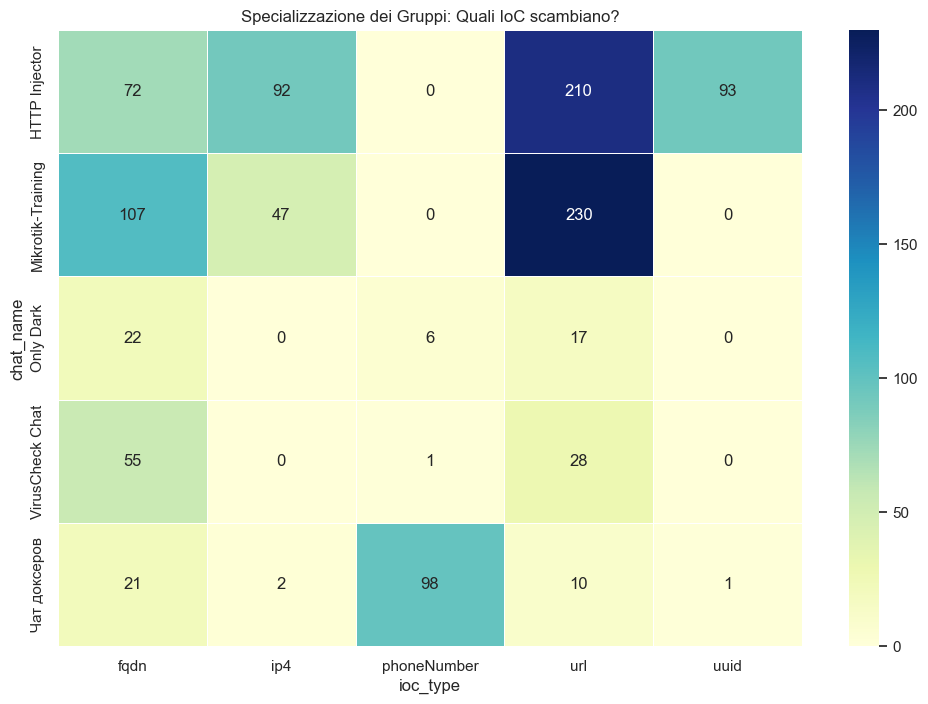

Parole chiave per IP: [('40daredevill_404', 245), ('none', 97), ('type', 74), ('host', 54), ('vless', 51)]
Parole chiave per URL: [('none', 338), ('40daredevill_404', 267), ('type', 223), ('trojan', 182), ('vless', 180)]


C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\1897214175.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="rocket")


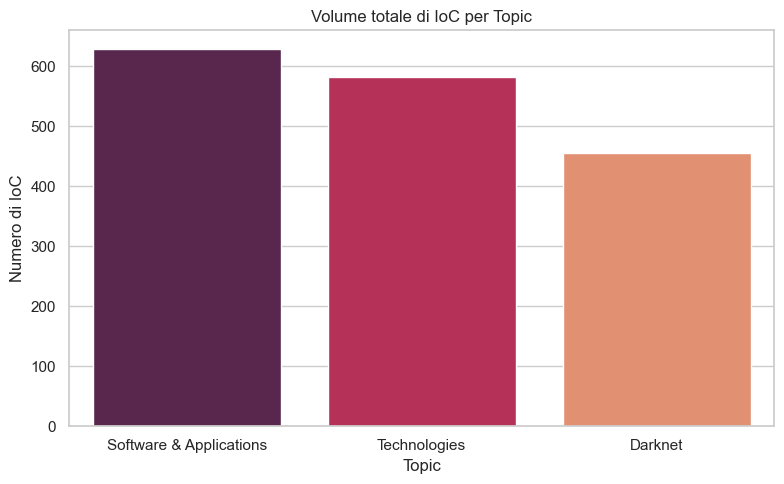

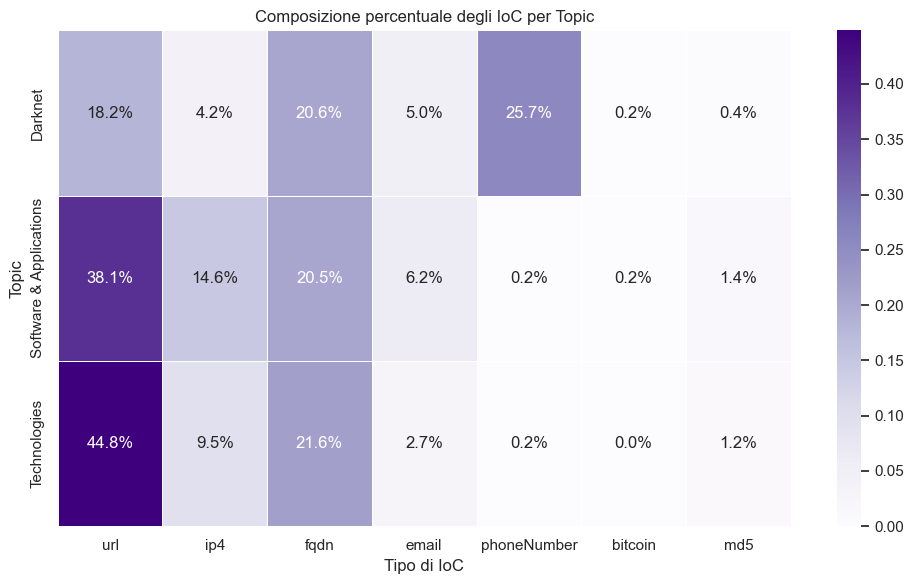


=== TOP 3 IOC PIÙ SCAMBIATI PER TOPIC ===

📂 DARKNET:
   -  ©QWERTY Smm🔈 (Visto 1 volte)
   - +16284003238 (Visto 1 volte)
   - +17694876097 (Visto 1 volte)

📂 SOFTWARE & APPLICATIONS:
   - +79211091817 (Visto 1 volte)
   - -msv2ray-channel-@back.msv2ray.online (Visto 1 volte)
   - 050f9e667e41ec8663b2709db6e0d4e08eba9b1d734e2389c5c3afdfb5a4231e (Visto 1 volte)

📂 TECHNOLOGIES:
   - +251918771572 (Visto 1 volte)
   - 0.0.0.0/1 (Visto 1 volte)
   - 0000:0000:0000:0000:0000:ffff:a7eb:f257 (Visto 1 volte)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

##### SOLO GRAFICI


# 1. Caricamento Dati
df = pd.read_csv('IOC_EXTRACTED_DATASET.csv')
sns.set_theme(style="whitegrid") # Stile pulito per report accademici

# --- METRICA 1: Volume per Gruppo ---
plt.figure(figsize=(10, 6))
# Prendiamo i top 10 gruppi per leggibilità
top_groups = df['chat_name'].value_counts().head(10)
sns.barplot(x=top_groups.values, y=top_groups.index, palette="viridis")
plt.title("Volume di IoC estratti per Gruppo")
plt.xlabel("Numero di IoC")
plt.tight_layout()
plt.show()

# --- METRICA 2: Heatmap (Chi scambia cosa) ---
# Filtriamo per i top 5 gruppi e top 5 tipi di IoC per chiarezza
top_groups_list = df['chat_name'].value_counts().head(5).index
top_types_list = df['ioc_type'].value_counts().head(5).index
filtered_df = df[df['chat_name'].isin(top_groups_list) & df['ioc_type'].isin(top_types_list)]

# Creiamo la tabella pivot
crosstab = pd.crosstab(filtered_df['chat_name'], filtered_df['ioc_type'])

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="YlGnBu", linewidths=.5)
plt.title("Specializzazione dei Gruppi: Quali IoC scambiano?")
plt.show()

# --- METRICA 3: Analisi del Contesto (Topic Modeling semplice) ---
def analyze_context(ioc_type):
    # Prende tutti i testi che contengono quel tipo di IoC
    texts = df[df['ioc_type'] == ioc_type]['text'].dropna().tolist()
    text_blob = " ".join(texts).lower()
    # Trova parole di almeno 4 lettere
    words = re.findall(r'\b\w{4,}\b', text_blob)
    # Rimuovi parole comuni (stopwords)
    stopwords = {'http', 'https', 'with', 'this', 'that', 'from', 'code', 'data'}
    clean_words = [w for w in words if w not in stopwords]
    return Counter(clean_words).most_common(5)

print("Parole chiave per IP:", analyze_context('ip4'))
print("Parole chiave per URL:", analyze_context('url'))


# --- METRICA 4: ANALISI PER TOPIC ---

# A. Volume totale per Topic (Chi ne ha di più?)
plt.figure(figsize=(8, 5))
topic_counts = df['topic'].value_counts()
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="rocket")
plt.title("Volume totale di IoC per Topic")
plt.ylabel("Numero di IoC")
plt.xlabel("Topic")
plt.tight_layout()
plt.savefig('metric_topic_volume.png')
plt.show()

# B. Heatmap Normalizzata: Topic vs Tipo IoC
# Normalizziamo (percentuale) per vedere la DISTRIBUZIONE, non solo il volume
crosstab_topic = pd.crosstab(df['topic'], df['ioc_type'], normalize='index')

# Selezioniamo solo i tipi di IoC più rilevanti per pulire il grafico
relevant_types = ['url', 'ip4', 'fqdn', 'email', 'phoneNumber', 'bitcoin', 'md5']
crosstab_topic_filtered = crosstab_topic[relevant_types]

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_topic_filtered, annot=True, fmt=".1%", cmap="Purples", linewidths=.5)
plt.title("Composizione percentuale degli IoC per Topic")
plt.ylabel("Topic")
plt.xlabel("Tipo di IoC")
plt.tight_layout()
plt.savefig('metric_topic_heatmap.png')
plt.show()

# C. Top 3 IoC più frequenti per ogni Topic
# Raggruppa per Topic e IoC, conta le occorrenze
top_ioc_by_topic = df.groupby(['topic', 'ioc_value']).size().reset_index(name='count')
# Ordina per topic e poi per conteggio decrescente
top_ioc_by_topic = top_ioc_by_topic.sort_values(['topic', 'count'], ascending=[True, False])
# Prendi i primi 3 per ogni gruppo
top3 = top_ioc_by_topic.groupby('topic').head(3)

print("\n=== TOP 3 IOC PIÙ SCAMBIATI PER TOPIC ===")
# Formattiamo l'output per renderlo leggibile
for topic, group in top3.groupby('topic'):
    print(f"\n📂 {topic.upper()}:")
    for _, row in group.iterrows():
        print(f"   - {row['ioc_value']} (Visto {row['count']} volte)")


📊 TABELLA DATI: Volume di IoC estratti per Gruppo (Top 10)
  Nome Gruppo                 Numero IoC
0              HTTP Injector  525       
1          Mikrotik-Training  483       
2               Чат доксеров  173       
3                  Only Dark  105       
4            VirusCheck Chat   95       
5         HTTP Injector Chat   95       
6  Хакеры |Чат| 𝓗𝓪𝓬𝓴𝓮𝓻𝓼 𝓬𝓱𝓪𝓽   62       
7                   DDOS交流攻击   60       
8        Теневой Даркнет Чат   30       
9              Hacking Realm   26       


C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groups.values, y=top_groups.index, palette="viridis")
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:43: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:43: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:43: UserWarning: Glyph 120044 (\N{MATHEMATICAL BOLD SCRIPT SMALL C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:43: UserWarning: Glyph 120052 (\N{MATHEMATICAL BOLD SCRIPT SMAL

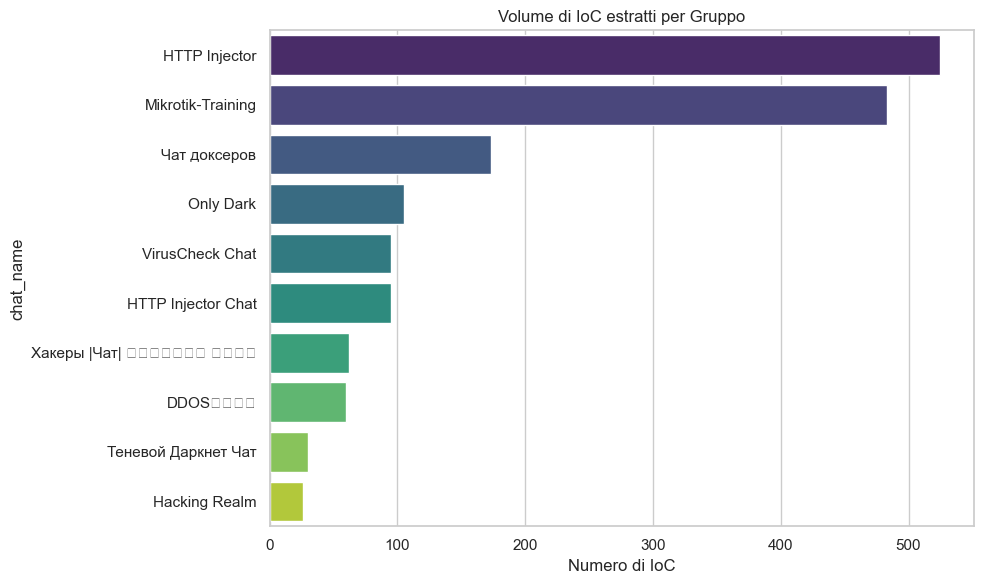


📊 TABELLA DATI: Specializzazione Gruppi vs Tipo IoC (Valori Assoluti)
ioc_type           fqdn  ip4  phoneNumber  url  uuid
chat_name                                           
HTTP Injector       72   92    0           210  93  
Mikrotik-Training  107   47    0           230   0  
Only Dark           22    0    6            17   0  
VirusCheck Chat     55    0    1            28   0  
Чат доксеров        21    2   98            10   1  


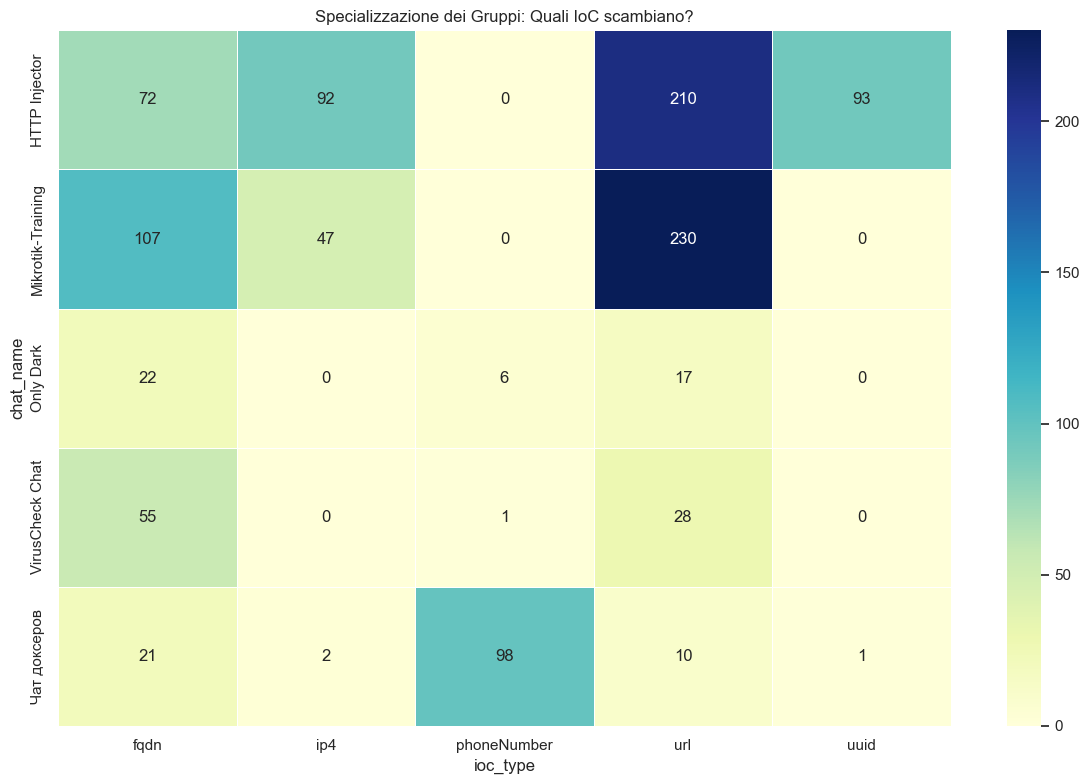


📊 TABELLA DATI: Parole più frequenti nel contesto (NLP)
 Rank IP Context             URL Context           
1     40daredevill_404 (245)             none (338)
2                  none (97) 40daredevill_404 (267)
3                  type (74)             type (223)
4                  host (54)           trojan (182)
5                 vless (51)            vless (180)

📊 TABELLA DATI: Volume Totale per Topic
  Topic                     Totale IoC
0  Software & Applications  628       
1             Technologies  582       
2                  Darknet  456       


C:\Users\apisp\AppData\Local\Temp\ipykernel_12752\2507022841.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="rocket")


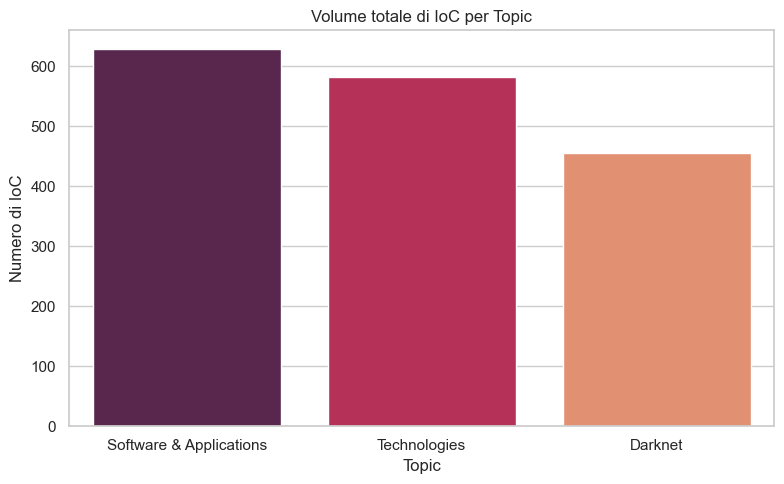


📊 TABELLA DATI: Distribuzione % dei Tipi di IoC per Topic
ioc_type                url     ip4     fqdn    email  phoneNumber bitcoin md5   
topic                                                                            
Darknet                   18.2%   4.17%  20.61%  5.04%  25.66%      0.22%   0.44%
Software & Applications  38.06%  14.65%  20.54%  6.21%   0.16%      0.16%   1.43%
Technologies             44.85%   9.45%  21.65%  2.75%   0.17%       0.0%    1.2%


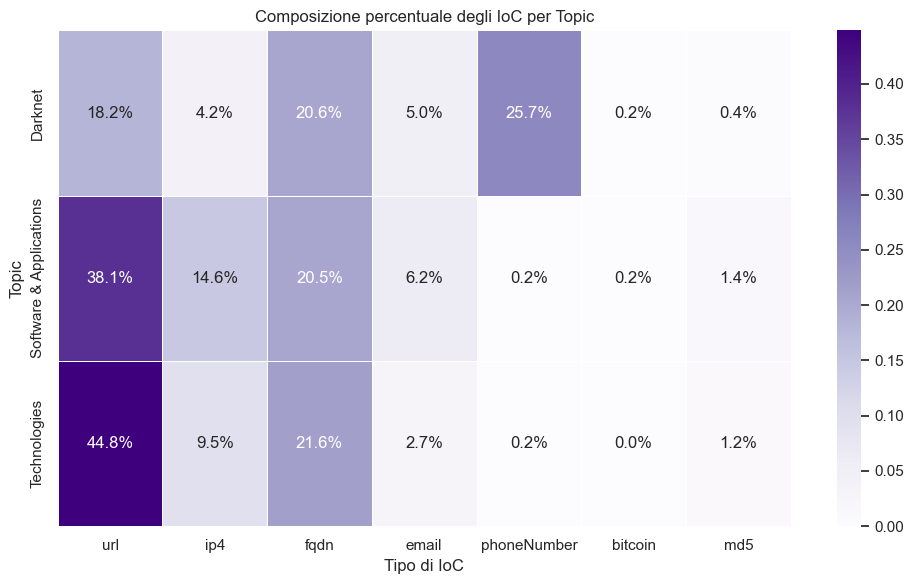


📊 TABELLA DATI: Top 3 IoC specifici per Topic
Topic                   IoC                                                               Frequenza
                Darknet                                                     ©QWERTY Smm🔈 1         
                Darknet                                                     +16284003238 1         
                Darknet                                                     +17694876097 1         
Software & Applications                                                     +79211091817 1         
Software & Applications                            -msv2ray-channel-@back.msv2ray.online 1         
Software & Applications 050f9e667e41ec8663b2709db6e0d4e08eba9b1d734e2389c5c3afdfb5a4231e 1         
           Technologies                                                    +251918771572 1         
           Technologies                                                        0.0.0.0/1 1         
           Technologies                          0000

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

### GRAFICI E TABELLE

# ================= CONFIGURAZIONE =================
# Impostazioni per visualizzare tutte le colonne/righe nelle tabelle in console
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'left')

# Funzione helper per stampare titoli delle tabelle
def print_table_header(title):
    print("\n" + "="*60)
    print(f"📊 TABELLA DATI: {title}")
    print("="*60)

# 1. Caricamento Dati
df = pd.read_csv('IOC_EXTRACTED_DATASET.csv')
sns.set_theme(style="whitegrid") 

# =========================================================
# METRICA 1: Volume per Gruppo
# =========================================================
top_groups = df['chat_name'].value_counts().head(10)

# -- STAMPA TABELLA --
print_table_header("Volume di IoC estratti per Gruppo (Top 10)")
# Convertiamo in DataFrame per una stampa pulita
table_1 = top_groups.reset_index()
table_1.columns = ['Nome Gruppo', 'Numero IoC']
print(table_1)

# -- GRAFICO --
plt.figure(figsize=(10, 6))
sns.barplot(x=top_groups.values, y=top_groups.index, palette="viridis")
plt.title("Volume di IoC estratti per Gruppo")
plt.xlabel("Numero di IoC")
plt.tight_layout()
plt.show()

# =========================================================
# METRICA 2: Heatmap (Chi scambia cosa)
# =========================================================
top_groups_list = df['chat_name'].value_counts().head(5).index
top_types_list = df['ioc_type'].value_counts().head(5).index
filtered_df = df[df['chat_name'].isin(top_groups_list) & df['ioc_type'].isin(top_types_list)]

# Creiamo la tabella pivot
crosstab = pd.crosstab(filtered_df['chat_name'], filtered_df['ioc_type'])

# -- STAMPA TABELLA --
print_table_header("Specializzazione Gruppi vs Tipo IoC (Valori Assoluti)")
print(crosstab)

# -- GRAFICO --
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="YlGnBu", linewidths=.5)
plt.title("Specializzazione dei Gruppi: Quali IoC scambiano?")
plt.tight_layout()
plt.show()

# =========================================================
# METRICA 3: Analisi del Contesto
# =========================================================
def analyze_context(ioc_type):
    texts = df[df['ioc_type'] == ioc_type]['text'].dropna().tolist()
    text_blob = " ".join(texts).lower()
    words = re.findall(r'\b\w{4,}\b', text_blob)
    stopwords = {'http', 'https', 'with', 'this', 'that', 'from', 'code', 'data', 'sono', 'come', 'delle'}
    clean_words = [w for w in words if w not in stopwords]
    return Counter(clean_words).most_common(5)

# Prepariamo i dati per la tabella
words_ip = analyze_context('ip4')
words_url = analyze_context('url')

# -- STAMPA TABELLA --
print_table_header("Parole più frequenti nel contesto (NLP)")
df_context = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'IP Context': [f"{w} ({c})" for w, c in words_ip],
    'URL Context': [f"{w} ({c})" for w, c in words_url]
})
print(df_context.to_string(index=False))

# (Nessun grafico qui, solo print come da tuo script originale)

# =========================================================
# METRICA 4A: Volume totale per Topic
# =========================================================
topic_counts = df['topic'].value_counts()

# -- STAMPA TABELLA --
print_table_header("Volume Totale per Topic")
table_4a = topic_counts.reset_index()
table_4a.columns = ['Topic', 'Totale IoC']
print(table_4a)

# -- GRAFICO --
plt.figure(figsize=(8, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="rocket")
plt.title("Volume totale di IoC per Topic")
plt.ylabel("Numero di IoC")
plt.xlabel("Topic")
plt.tight_layout()
plt.savefig('metric_topic_volume.png')
plt.show()

# =========================================================
# METRICA 4B: Topic vs Tipo IoC (Percentuali)
# =========================================================
crosstab_topic = pd.crosstab(df['topic'], df['ioc_type'], normalize='index')
relevant_types = ['url', 'ip4', 'fqdn', 'email', 'phoneNumber', 'bitcoin', 'md5']
# Filtriamo solo le colonne che esistono davvero nel dataset
existing_cols = [c for c in relevant_types if c in crosstab_topic.columns]
crosstab_topic_filtered = crosstab_topic[existing_cols]

# -- STAMPA TABELLA --
print_table_header("Distribuzione % dei Tipi di IoC per Topic")
# Moltiplichiamo per 100 e arrotondiamo per leggere meglio
print(crosstab_topic_filtered.mul(100).round(2).astype(str) + '%')

# -- GRAFICO --
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_topic_filtered, annot=True, fmt=".1%", cmap="Purples", linewidths=.5)
plt.title("Composizione percentuale degli IoC per Topic")
plt.ylabel("Topic")
plt.xlabel("Tipo di IoC")
plt.tight_layout()
plt.savefig('metric_topic_heatmap.png')
plt.show()

# =========================================================
# METRICA 4C: Top 3 IoC per Topic
# =========================================================
top_ioc_by_topic = df.groupby(['topic', 'ioc_value']).size().reset_index(name='count')
top_ioc_by_topic = top_ioc_by_topic.sort_values(['topic', 'count'], ascending=[True, False])
top3 = top_ioc_by_topic.groupby('topic').head(3)

# -- STAMPA TABELLA --
print_table_header("Top 3 IoC specifici per Topic")
# Puliamo un po' la tabella finale per la stampa
final_table = top3.rename(columns={'topic': 'Topic', 'ioc_value': 'IoC', 'count': 'Frequenza'})
print(final_table.to_string(index=False))

print("\n" + "="*60)
print("✅ Finito. Tutte le tabelle sono state stampate sopra i grafici.")